In [1]:
import pandas as pd
import os

In [10]:
from scipy.stats import friedmanchisquare, wilcoxon

conditions = ['No Music', 'Non Sync', 'Sync']

pos_enjoyment_cols = [
    'experience_fun',
    'experience_interesting',
    'enjoyed_experience',
    'enjoy_exercising_more',
    'willing_to_do_again',
    'enjoyed_experience_2',
    'activity_enjoyable'
]

neg_enjoyment_cols = [
    'boring_experience',
    'did_not_hold_attention'
]


exertion_col = 'exertion'

enjoyment_df = pd.DataFrame(columns=['player', 'condition','score', 'enjoyment', 'exertion'])

for condition in conditions:
    path = os.path.join('../ProcessedData', condition, 'post_df.csv')
    df = pd.read_csv(path)
    for _, row in df.iterrows():
        enjoyment_score = row[pos_enjoyment_cols].sum() - row[neg_enjoyment_cols].sum()
        exertion_score = row[exertion_col]
        player_name = row['name'].split()[0].lower()
        game_df = pd.read_csv(os.path.join('../ProcessedData', condition, f"{player_name}.csv"))
        score = game_df['score'].max()
        new_row = {'player': player_name, 'condition': condition, 'score':int(score), 'enjoyment': float(enjoyment_score), 'exertion': float(exertion_score)}
        enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)

enjoyment_df = enjoyment_df.astype({'player': 'str', 'condition': 'str', 'score': 'Int64', 'enjoyment': 'float', 'exertion': 'float'})

print("enjoyment_df:")
print(enjoyment_df)
print()


enjoyment_wide = enjoyment_df.pivot(index='player', columns='condition', values='enjoyment')
exertion_wide = enjoyment_df.pivot(index='player', columns='condition', values='exertion')
print("enjoyment_wide:")
print(enjoyment_wide)
print()
print("exertion_wide:")
print(exertion_wide)
print()

enjoyment_nm = enjoyment_wide['No Music']
enjoyment_ns = enjoyment_wide['Non Sync']
enjoyment_sy = enjoyment_wide['Sync']

exertion_nm = exertion_wide['No Music']
exertion_ns = exertion_wide['Non Sync']
exertion_sy = exertion_wide['Sync']

# Friedman's test for enjoyment
stat_enjoy, p_enjoy = friedmanchisquare(
    enjoyment_nm, enjoyment_ns, enjoyment_sy
)
print(f"Friedman's test for enjoyment: statistic={stat_enjoy:.3f}, p-value={p_enjoy:.4f}")

# Friedman's test for exertion
stat_exert, p_exert = friedmanchisquare(
    exertion_nm, exertion_ns, exertion_sy
)
print(f"Friedman's test for exertion: statistic={stat_exert:.3f}, p-value={p_exert:.4f}")

# Wilcoxon signed-rank test for No Music vs Sync
diff = enjoyment_nm - enjoyment_sy
if (diff != 0).any():
    w_stat_enjoy, w_p_enjoy = wilcoxon(enjoyment_nm, enjoyment_sy)
    print(f"Wilcoxon test (No Music vs Sync) for enjoyment: statistic={w_stat_enjoy:.3f}, p-value={w_p_enjoy:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: No Music vs Sync")

diff = exertion_nm - exertion_sy
if (diff != 0).any():
    w_stat_exert, w_p_exert = wilcoxon(exertion_wide['No Music'], exertion_wide['Sync'])
    print(f"Wilcoxon test (No Music vs Sync) for exertion: statistic={w_stat_exert:.3f}, p-value={w_p_exert:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: No Music vs Sync")

# Wilcoxon signed-rank test for Non Sync vs Sync
diff = enjoyment_ns - enjoyment_sy
if (diff != 0).any():
    w_stat_enjoy_ns, w_p_enjoy_ns = wilcoxon(enjoyment_ns, enjoyment_sy)
    print(f"Wilcoxon test (Non Sync vs Sync) for enjoyment: statistic={w_stat_enjoy_ns:.3f}, p-value={w_p_enjoy_ns:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: Non Sync vs Sync")

diff = exertion_ns - exertion_sy
if (diff != 0).any():
    w_stat_exert_ns, w_p_exert_ns = wilcoxon(exertion_ns, exertion_sy)
    print(f"Wilcoxon test (Non Sync vs Sync) for exertion: statistic={w_stat_exert_ns:.3f}, p-value={w_p_exert_ns:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: Non Sync vs Sync")

# Wilcoxon signed-rank test for No Music vs Non Sync
diff = enjoyment_nm - enjoyment_ns
if (diff != 0).any():
    w_stat_enjoy_nn, w_p_enjoy_nn = wilcoxon(enjoyment_nm, enjoyment_ns)
    print(f"Wilcoxon test (No Music vs Non Sync) for enjoyment: statistic={w_stat_enjoy_nn:.3f}, p-value={w_p_enjoy_nn:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: No Music vs Non Sync")

diff = exertion_nm - exertion_ns
if (diff != 0).any():
    w_stat_exert_nn, w_p_exert_nn = wilcoxon(exertion_nm, exertion_ns)
    print(f"Wilcoxon test (No Music vs Non Sync) for exertion: statistic={w_stat_exert_nn:.3f}, p-value={w_p_exert_nn:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: No Music vs Non Sync")

enjoyment_df:
     player condition  score  enjoyment  exertion
0   charles  No Music   8112       11.0       9.0
1     eason  No Music   8000       16.0      12.0
2    gallon  No Music   9200       17.0      17.0
3    joshua  No Music   6152       -8.0      11.0
4   charles  Non Sync   9144       11.0       9.0
5     eason  Non Sync   6992       20.0      12.0
6    gallon  Non Sync   8992       13.0      17.0
7    joshua  Non Sync   4600       -4.0      13.0
8   charles      Sync  10072       11.0      10.0
9     eason      Sync   7984       20.0      15.0
10   gallon      Sync   8872       15.0      17.0
11   joshua      Sync   6856       -7.0      13.0

enjoyment_wide:
condition  No Music  Non Sync  Sync
player                             
charles        11.0      11.0  11.0
eason          16.0      20.0  20.0
gallon         17.0      13.0  15.0
joshua         -8.0      -4.0  -7.0

exertion_wide:
condition  No Music  Non Sync  Sync
player                             
charles        

C:\Users\eason\AppData\Local\Temp\ipykernel_21452\1078083207.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)
c:\Python311\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


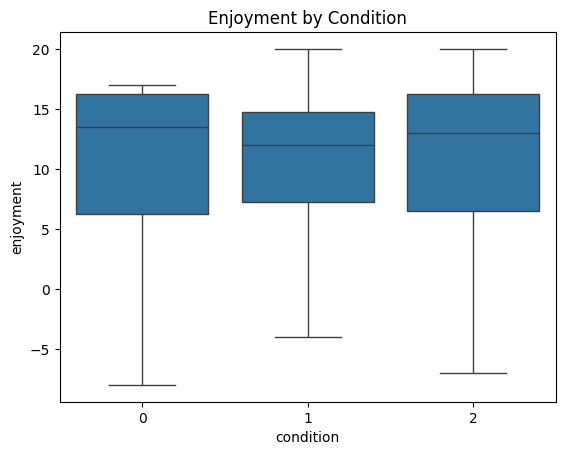

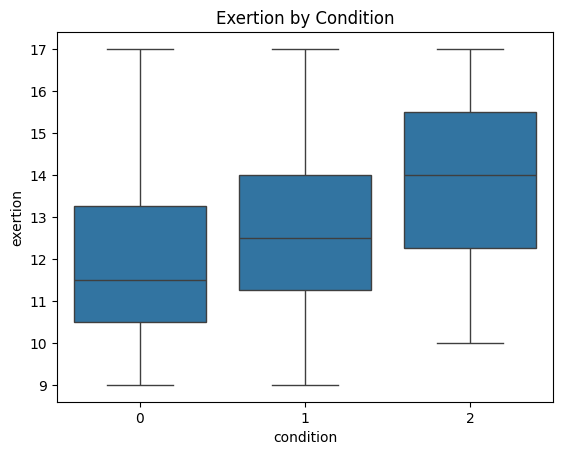

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='condition', y='enjoyment', data=enjoyment_df)
plt.title('Enjoyment by Condition')
plt.show()

sns.boxplot(x='condition', y='exertion', data=enjoyment_df)
plt.title('Exertion by Condition')
plt.show()